# Basics

In [1]:
import matplotlib.pyplot as plt


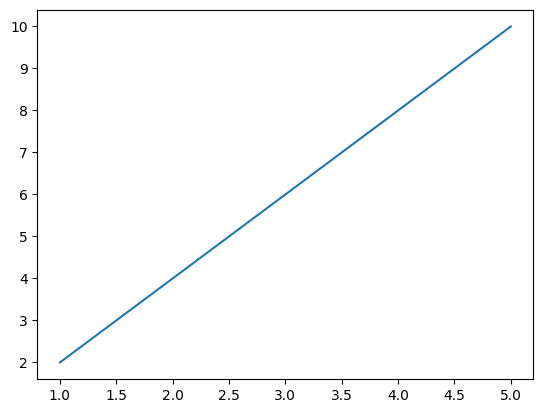

In [2]:

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)
plt.show()


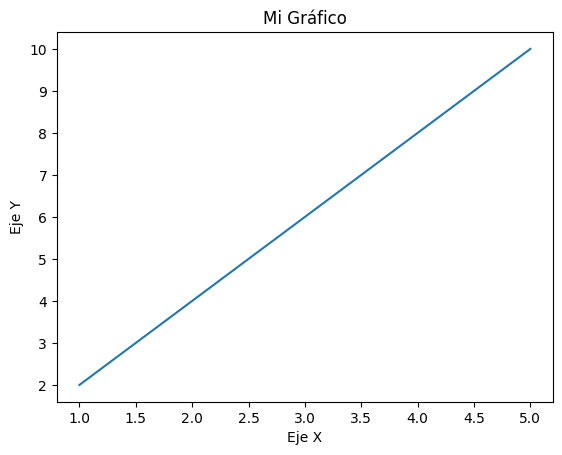

In [3]:
plt.plot(x, y)
plt.title('Mi Gráfico')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()


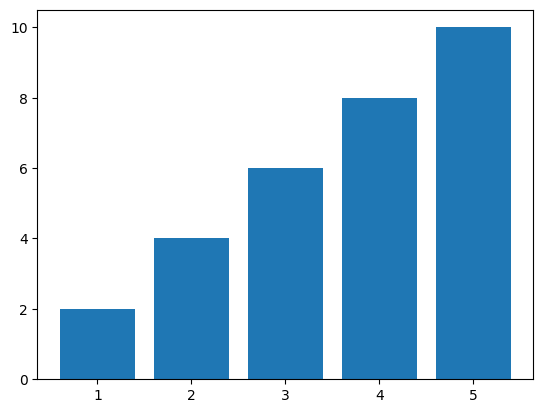

In [4]:
plt.bar(x, y)
plt.show()


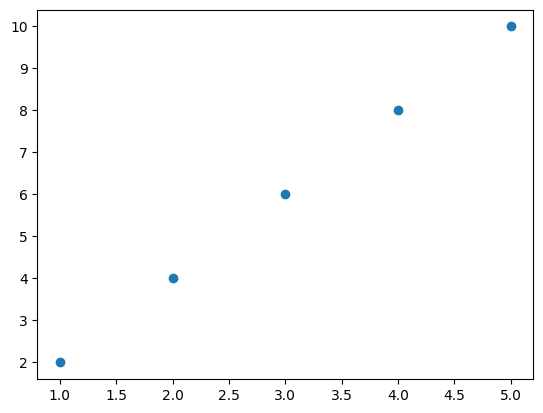

In [5]:
plt.scatter(x, y)
plt.show()


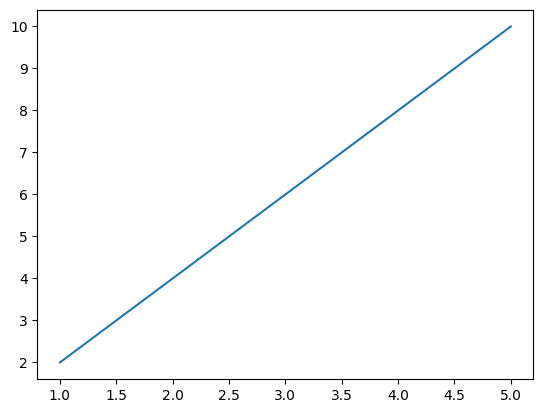

In [6]:
plt.plot(x, y)
plt.savefig('../../../outputs/files/mi_grafico.png')


# USE CASE - EDA

In [26]:
from utils import globalsettings as gs
import pandas as pd

In [28]:
df = pd.read_csv(gs.the_files.ATTRITION)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


1. Gráficos Simples
    + Histograma de Edades: Para visualizar la distribución de edades en la empresa.
    + Gráfico de Barras de Atrición: Para ver la proporción de empleados que han dejado la empresa y los que permanecen.
2. Gráficos de Comparación
    + Gráfico de Caja (Boxplot) por Departamento: Para comparar la distribución de salarios o edades en diferentes departamentos.
    + Gráfico de Dispersión de Edad vs. Años en la Compañía: Para explorar la relación entre la edad de los empleados y su tiempo en la empresa.
3. Gráficos Multivariados
    + Gráfico de Barras Apiladas de Atrición por Departamento: Para ver la tasa de abandono en diferentes departamentos.
    + Heatmap de Correlación: Para visualizar las relaciones entre diferentes variables numéricas en los datos.
4. Visualizaciones Avanzadas
    + Gráfico de Radar para Análisis de Empleados: Si deseas comparar empleados en varios aspectos, como satisfacción, balance entre vida y trabajo, años en la empresa, etc.
    + Gráfico de Facetas (FacetGrid): Para comparar distribuciones en varias categorías y niveles, por ejemplo, la satisfacción en diferentes departamentos y niveles de educación.

## Gráficos simples

### Histograma

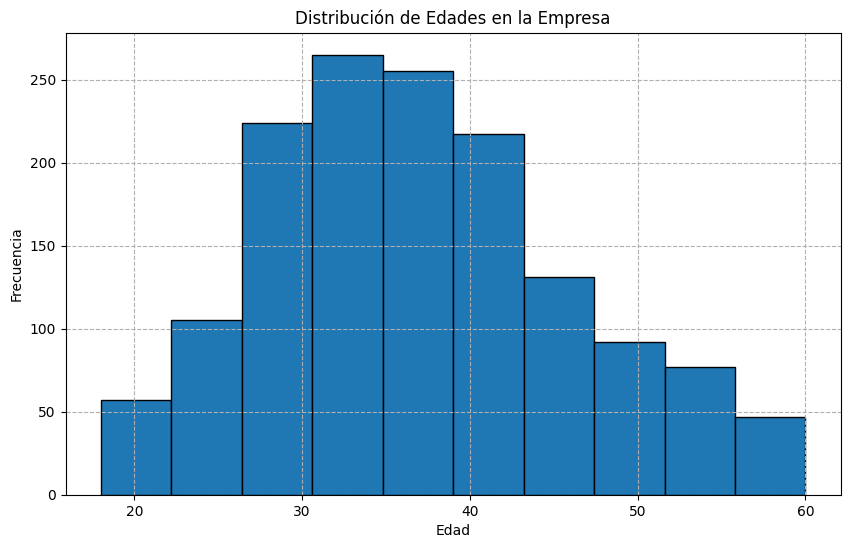

In [29]:
# Creando un histograma para la columna 'Age'
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Distribución de Edades en la Empresa')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--')
plt.show()

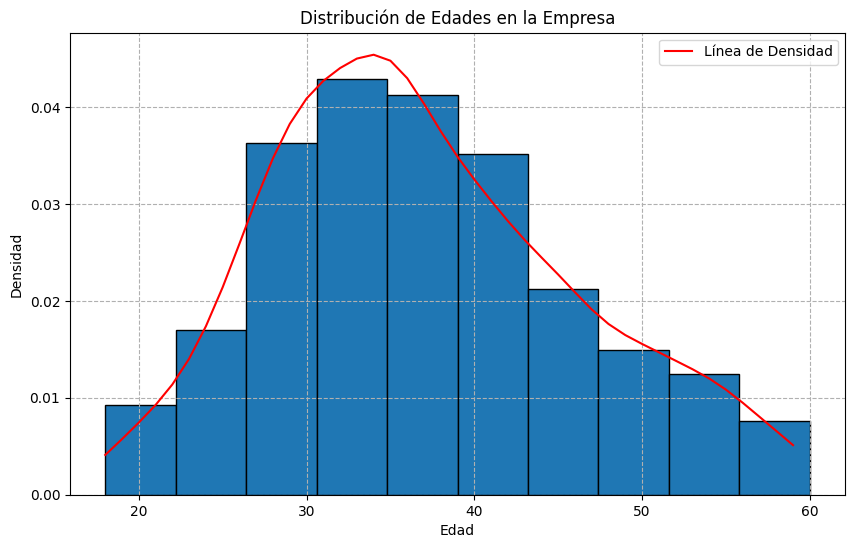

In [30]:
# Importando la biblioteca para calcular la densidad
from scipy.stats import gaussian_kde

# Calculando la densidad
density = gaussian_kde(df['Age'])
ages_range = range(min(df['Age']), max(df['Age']))
density_values = density(ages_range)

# Creando el histograma como antes
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, edgecolor='black', density=True) # Usamos 'density=True' para normalizar el histograma
plt.plot(ages_range, density_values, color='red', label='Línea de Densidad') # Añadimos la línea de densidad
plt.title('Distribución de Edades en la Empresa')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

### Barchart

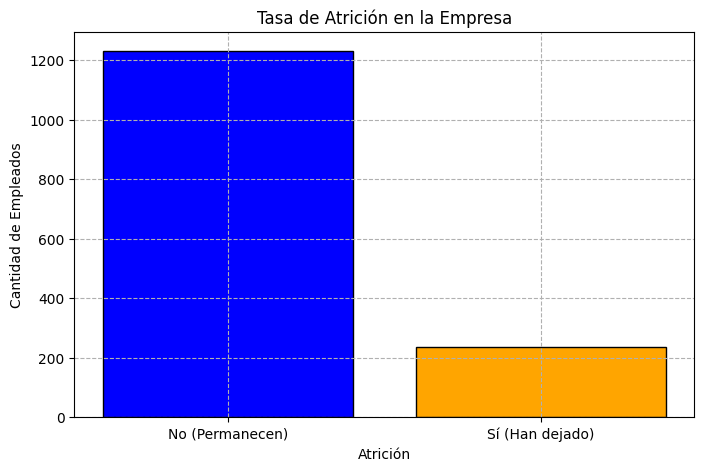

In [31]:
# Calculando la cantidad de empleados que han dejado y los que permanecen
attrition_counts = df['Attrition'].value_counts()

# Creando el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(attrition_counts.index, attrition_counts.values, color=['blue', 'orange'], edgecolor='black')
plt.title('Tasa de Atrición en la Empresa')
plt.xlabel('Atrición')
plt.ylabel('Cantidad de Empleados')
plt.xticks(ticks=[0, 1], labels=['No (Permanecen)', 'Sí (Han dejado)'])
plt.grid(True, linestyle='--')
plt.show()

## Gráficos de Comparación

### Boxplots

In [33]:
[df['Department'] == dept for dept in df['Department'].unique()]

[0        True
 1       False
 2       False
 3       False
 4       False
         ...  
 1465    False
 1466    False
 1467    False
 1468     True
 1469    False
 Name: Department, Length: 1470, dtype: bool,
 0       False
 1        True
 2        True
 3        True
 4        True
         ...  
 1465     True
 1466     True
 1467     True
 1468    False
 1469     True
 Name: Department, Length: 1470, dtype: bool,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1465    False
 1466    False
 1467    False
 1468    False
 1469    False
 Name: Department, Length: 1470, dtype: bool]

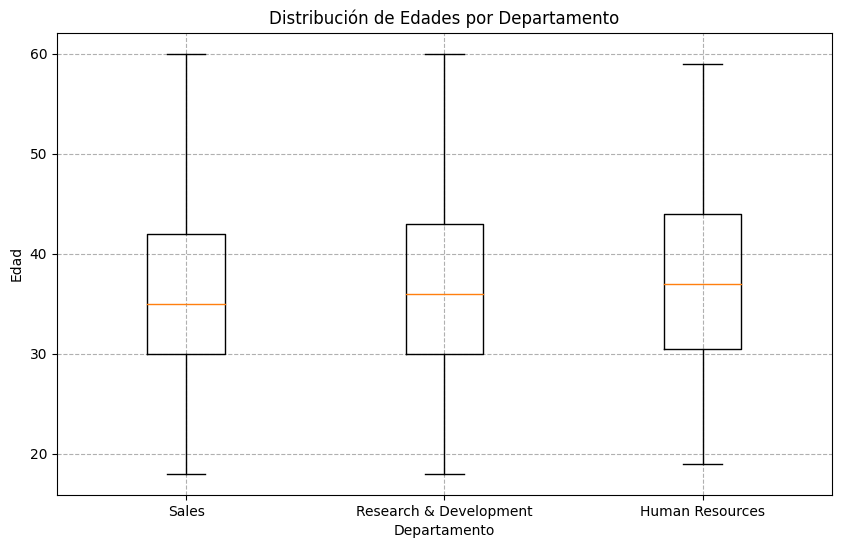

In [37]:
# Creando un gráfico de caja para comparar las edades en diferentes departamentos
plt.figure(figsize=(10, 6))
plt.boxplot([df['Age'][df['Department'] == dept] for dept in df['Department'].unique()],
            labels=df['Department'].unique())
plt.title('Distribución de Edades por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Edad')
plt.grid(True, linestyle='--')
plt.show()


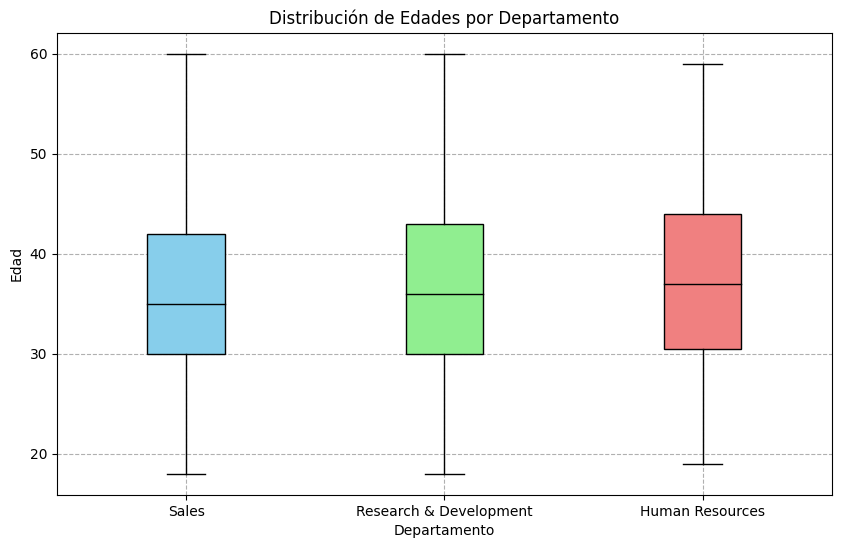

In [42]:
# Definiendo los colores para cada departamento
department_colors = ['skyblue', 'lightgreen', 'lightcoral']

# Creando el gráfico de caja con colores personalizados
plt.figure(figsize=(10, 6))
boxplots = plt.boxplot([df['Age'][df['Department'] == dept] for dept in df['Department'].unique()],
                       patch_artist=True,  # Permite rellenar con color
                       labels=df['Department'].unique())

# Aplicando los colores a cada boxplot
for patch, color in zip(boxplots['boxes'], department_colors):
    patch.set_facecolor(color)
    
# Cambiando el color de las líneas de la mediana a negro
for median_line in boxplots['medians']:
    median_line.set_color('black')

plt.title('Distribución de Edades por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Edad')
plt.grid(True, linestyle='--')
plt.show()


### Scatter plots

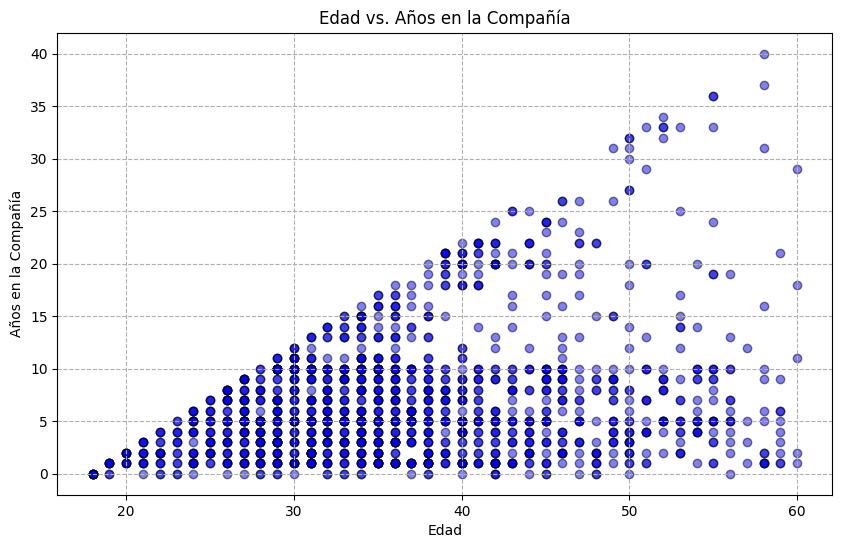

In [41]:
# Creando el gráfico de dispersión para la Edad vs. Años en la Compañía
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['YearsAtCompany'], c='blue', alpha=0.5, edgecolor='black')
plt.title('Edad vs. Años en la Compañía')
plt.xlabel('Edad')
plt.ylabel('Años en la Compañía')
plt.grid(True, linestyle='--')
plt.show()


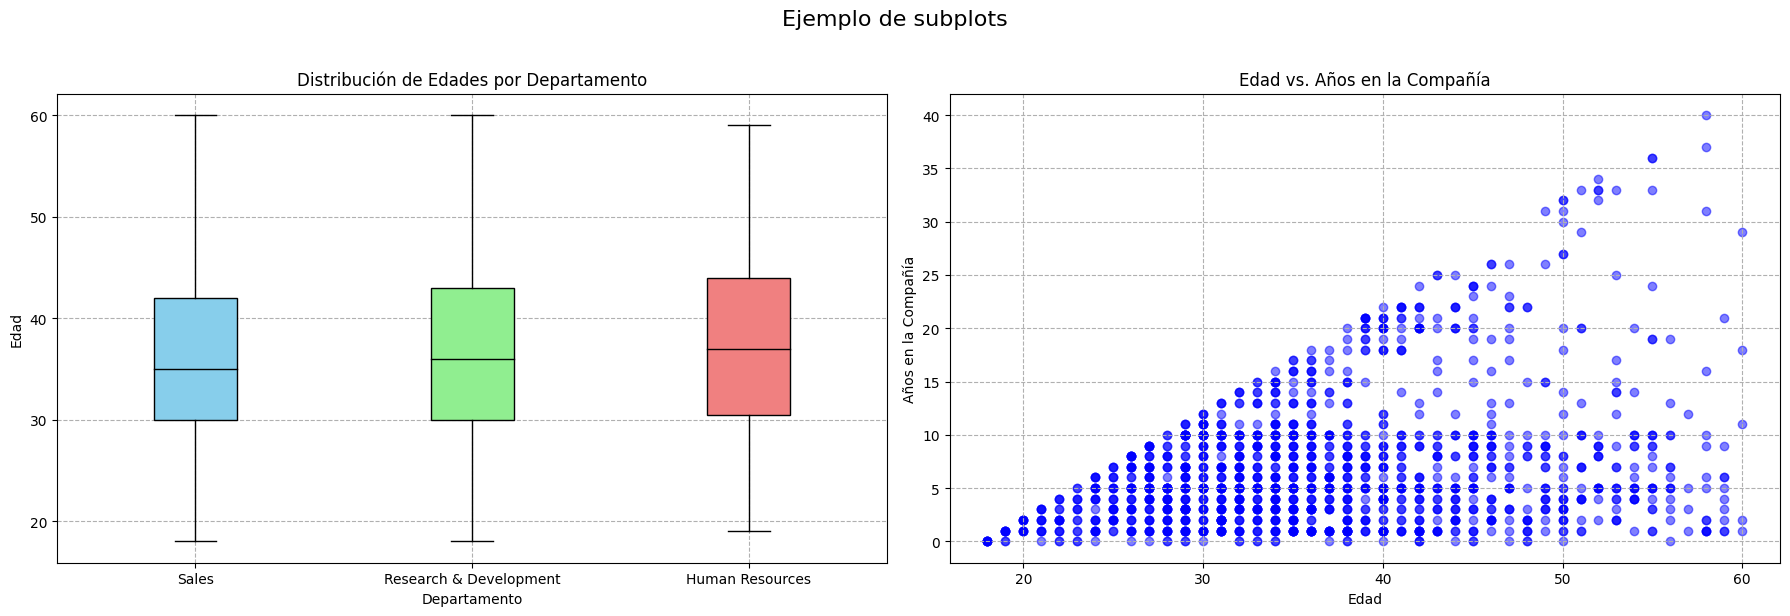

In [43]:
# Creando la figura con los dos subplots como antes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Primer Subplot: Boxplot de Edades por Departamento
# Creando el gráfico de caja para los departamentos
attrition_by_department_boxplots = axes[0].boxplot(
    [df['Age'][(df['Department'] == dept)] for dept in df['Department'].unique()],
    patch_artist=True)
for patch, color in zip(attrition_by_department_boxplots['boxes'], department_colors):
    patch.set_facecolor(color)
for median_line in attrition_by_department_boxplots['medians']:
    median_line.set_color('black')
axes[0].set_title('Distribución de Edades por Departamento')
axes[0].set_xlabel('Departamento')
axes[0].set_ylabel('Edad')
axes[0].set_xticks([1, 2, 3])
axes[0].set_xticklabels(df['Department'].unique())
axes[0].grid(True, linestyle='--')

# Segundo Subplot: Scatterplot de Edad vs. Años en la Compañía (sin cambios)
axes[1].scatter(df['Age'], df['YearsAtCompany'], c='blue', alpha=0.5)
axes[1].set_title('Edad vs. Años en la Compañía')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Años en la Compañía')
axes[1].grid(True, linestyle='--')

# Título general para toda la figura (sin cambios)
fig.suptitle('Ejemplo de subplots', fontsize=16, y=1.02)

# Ajustando el layout y mostrando la figura
plt.tight_layout()
plt.show()



##  Gráficos Multivariados

### Gráfico de Barras Apiladas de Atrición por Departamento: Para ver la tasa de abandono en diferentes departamentos.


In [44]:
df.groupby(['Department', 'Attrition']).size()

Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
dtype: int64

In [45]:
df.groupby(['Department', 'Attrition']).size().unstack()

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


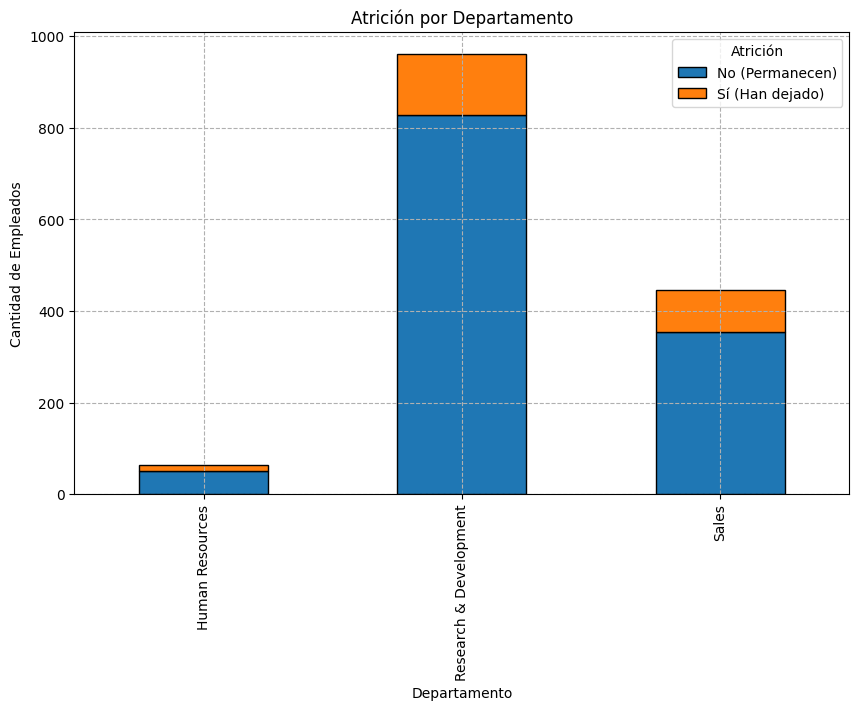

In [46]:
# Calculando la cantidad de empleados que han dejado y permanecido en cada departamento
attrition_by_department = df.groupby(['Department', 'Attrition']).size().unstack().fillna(0)

# Creando el gráfico de barras apiladas
attrition_by_department.plot(kind='bar', stacked=True, figsize=(10, 6), edgecolor='black')
plt.title('Atrición por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Empleados')
plt.grid(True, linestyle='--')
plt.legend(title='Atrición', labels=['No (Permanecen)', 'Sí (Han dejado)'])
plt.show()


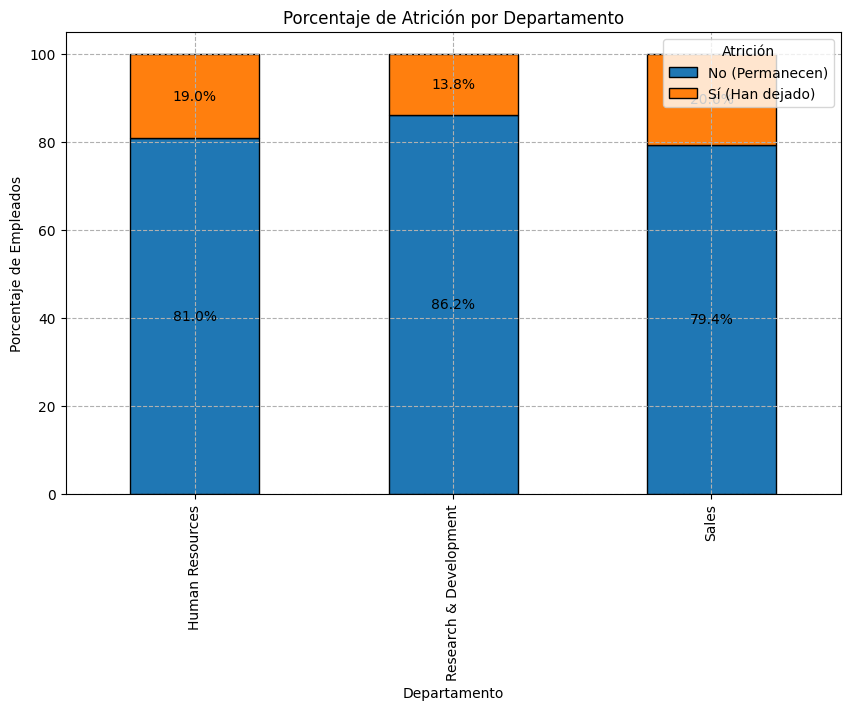

In [47]:
# Calculando los porcentajes de atrición y retención por departamento
attrition_percentages = attrition_by_department.div(attrition_by_department.sum(axis=1), axis=0) * 100

# Creando el gráfico de barras apiladas con porcentajes
ax = attrition_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), edgecolor='black')
plt.title('Porcentaje de Atrición por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Porcentaje de Empleados')
plt.grid(True, linestyle='--')
plt.legend(title='Atrición', labels=['No (Permanecen)', 'Sí (Han dejado)'])

# Añadiendo etiquetas de texto con el porcentaje dentro de cada "sub-bar"
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0: # Solo añadimos texto si hay una altura positiva
        ax.text(x + width/2, y + height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')

plt.show()


En el contexto de Matplotlib, `ax.patches` es una lista que contiene todos los parches (elementos gráficos) dibujados en el eje (denotado por ax). Un "parche" en Matplotlib es una forma 2D que puede tener un borde y un relleno, y se utiliza para representar muchas de las formas básicas en una gráfica, como rectángulos, círculos, polígonos, etc.

En el caso del gráfico de barras apiladas que hemos creado, cada "sub-bar" (la parte de la barra que representa la atrición o la retención en un departamento específico) es un parche en forma de rectángulo. Al iterar a través de ax.patches, estamos accediendo a cada uno de estos rectángulos, lo que nos permite obtener sus dimensiones y posiciones y añadir las etiquetas de texto con los porcentajes correspondientes.

La propiedad ax.patches es útil cuando se quiere realizar una personalización detallada de un gráfico, como modificar las propiedades de las formas individuales o añadir anotaciones basadas en la geometría de los elementos dibujados.

El método `p.get_xy()` retorna las coordenadas $(x,y)$ de la esquina inferior izquierda del parche (en este caso, un rectángulo que representa una "sub-bar" en el gráfico de barras apiladas).

+ $x$: La coordenada horizontal (posición en el eje $X$) de la esquina inferior izquierda del parche.
+ $y$: La coordenada vertical (posición en el eje $Y$) de la esquina inferior izquierda del parche.
Estas coordenadas son útiles para determinar la posición del parche en el espacio de la gráfica. En nuestro ejemplo, utilizamos `p.get_xy()` para calcular la posición donde colocar las etiquetas de texto con los porcentajes dentro de cada "sub-bar". Sumando la mitad del ancho y la mitad de la altura a estas coordenadas, pudimos posicionar las etiquetas en el centro de cada "sub-bar".

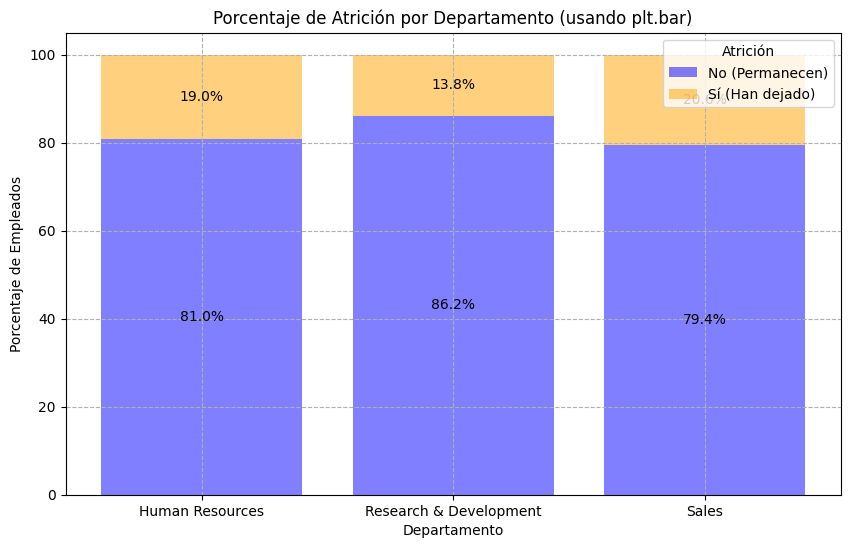

In [51]:
# Creando la figura
plt.figure(figsize=(10, 6))

# Creando la primera serie de barras (No - Permanecen)
bars_no = plt.bar(attrition_percentages.index, attrition_percentages['No'], color='blue', alpha=0.5, label='No (Permanecen)')

# Creando la segunda serie de barras (Sí - Han dejado), apiladas sobre la primera
bars_yes = plt.bar(attrition_percentages.index, attrition_percentages['Yes'], bottom=attrition_percentages['No'], color='orange', alpha=0.5, label='Sí (Han dejado)')

# Añadiendo etiquetas de texto con el porcentaje dentro de cada "sub-bar" para "No (Permanecen)"
for bar, percentage in zip(bars_no, attrition_percentages['No']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{percentage:.1f}%', ha='center', va='center', color='black')

# Añadiendo etiquetas de texto con el porcentaje dentro de cada "sub-bar" para "Sí (Han dejado)"
for bar, percentage in zip(bars_yes, attrition_percentages['Yes']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, f'{percentage:.1f}%', ha='center', va='center', color='black')

# Añadiendo etiquetas, título y leyenda
plt.title('Porcentaje de Atrición por Departamento (usando plt.bar)')
plt.xlabel('Departamento')
plt.ylabel('Porcentaje de Empleados')
plt.grid(True, linestyle='--')
plt.legend(title='Atrición')

# Mostrando el gráfico
plt.show()



### Heatmap de Correlación: Para visualizar las relaciones entre diferentes variables numéricas en los datos.


In [54]:
# Seleccionando solo las columnas numéricas
numerical_columns = df.select_dtypes(include=['number'])

# Calculando la matriz de correlación para las columnas numéricas
correlation_matrix = numerical_columns.corr()

correlation_matrix


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


(Salen `NaN`s porque son columnas de varianza nula)

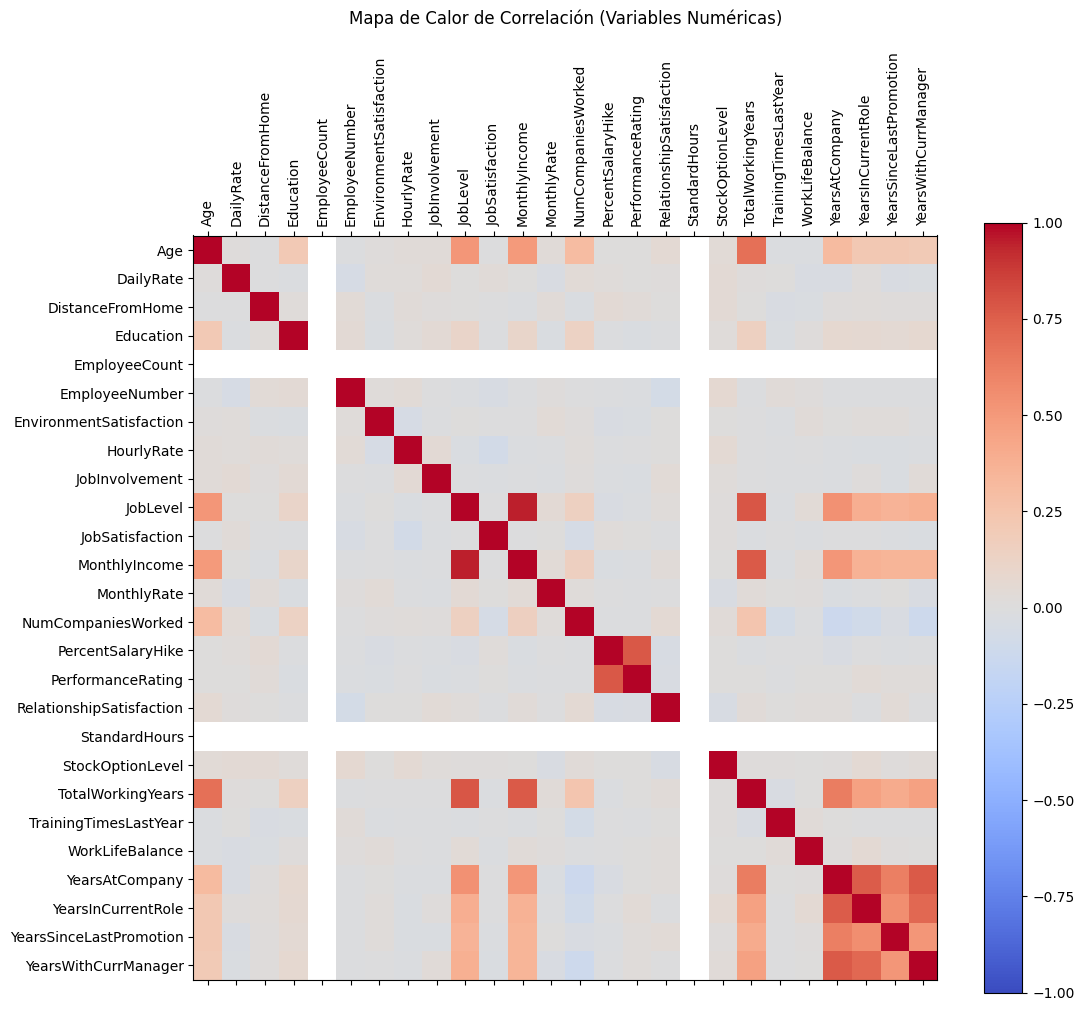

In [57]:
# Creando la figura
fig, ax = plt.subplots(figsize=(12, 10))

# Creando el mapa de calor de correlación con la escala de colores correcta
cax = ax.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Añadiendo una barra de colores
plt.colorbar(cax)

# Ajustando los detalles del gráfico
plt.title('Mapa de Calor de Correlación (Variables Numéricas)', pad=20)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


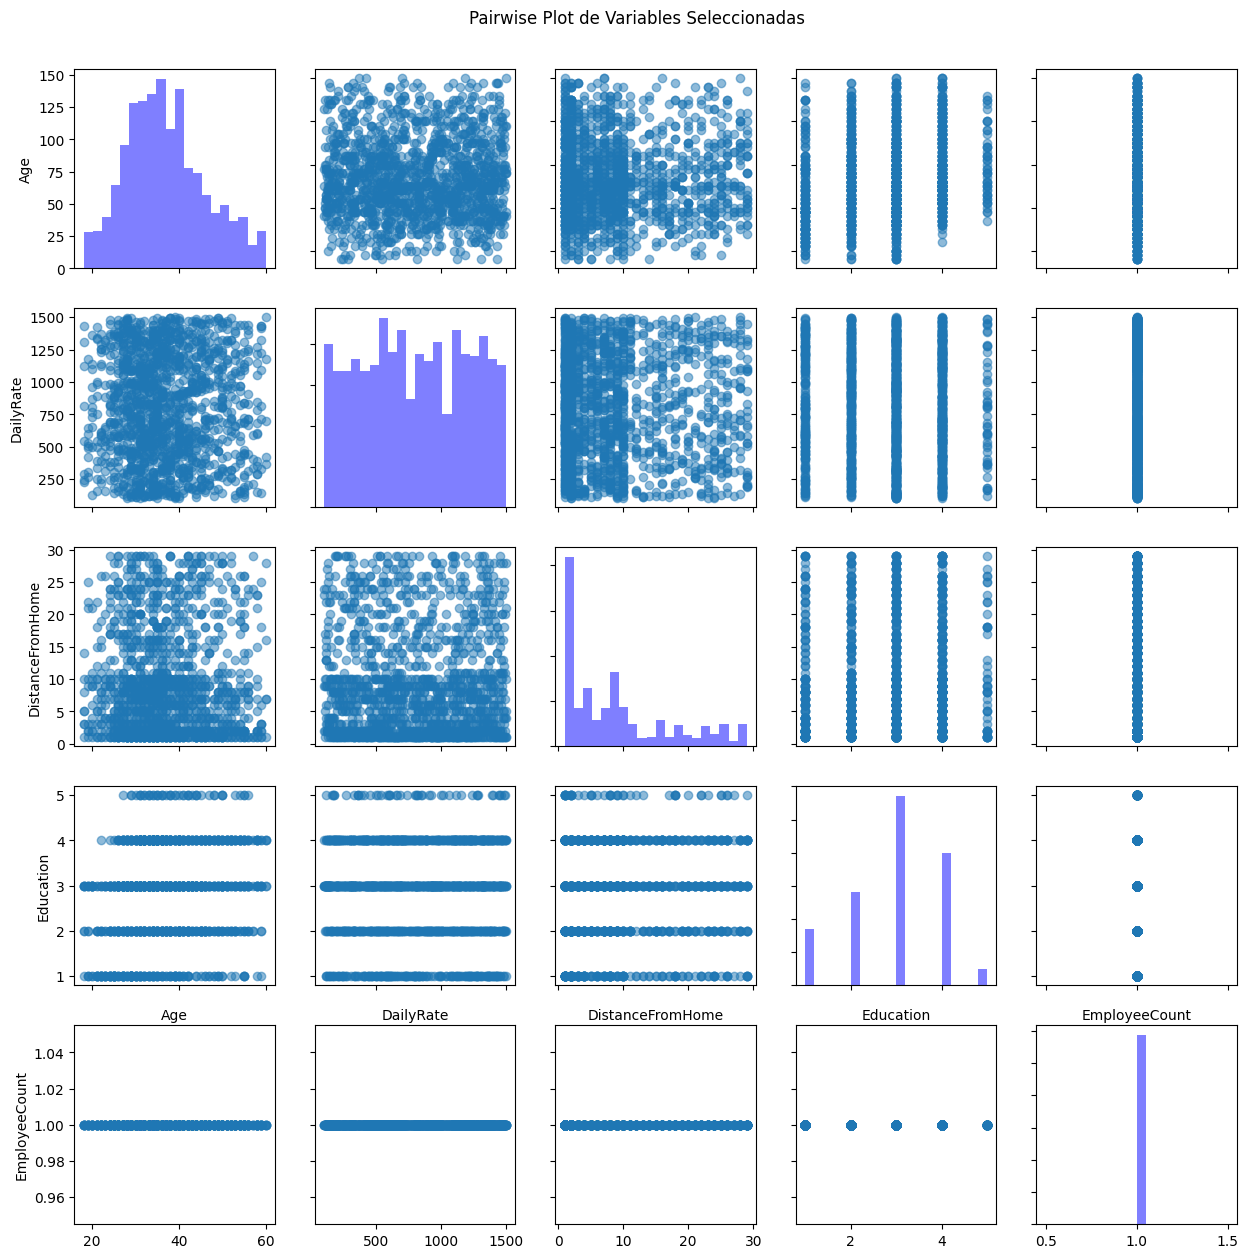

In [56]:
# Seleccionando un subconjunto de columnas numéricas para evitar un gráfico demasiado grande
selected_columns = numerical_columns.columns[:5]

# Creando la figura
fig, axes = plt.subplots(len(selected_columns), len(selected_columns), figsize=(15, 15))

# Iterando a través de cada par de variables para crear los gráficos de dispersión y histogramas
for i, col1 in enumerate(selected_columns):
    for j, col2 in enumerate(selected_columns):
        ax = axes[i, j]
        
        # Gráfico de dispersión para pares de variables diferentes
        if i != j:
            ax.scatter(numerical_columns[col2], numerical_columns[col1], alpha=0.5)
        
        # Histograma para la misma variable (diagonal)
        else:
            ax.hist(numerical_columns[col1], bins=20, alpha=0.5, color='blue')
        
        # Ocultando etiquetas para evitar el desorden
        if i < len(selected_columns) - 1:
            ax.set_xticklabels([])
        if j > 0:
            ax.set_yticklabels([])

# Añadiendo etiquetas de variables
for i, col in enumerate(selected_columns):
    axes[i, 0].set_ylabel(col)
    axes[-1, i].set_xlabel(col)
    axes[-1, i].xaxis.set_label_position('top')

plt.suptitle('Pairwise Plot de Variables Seleccionadas', y=0.92)
plt.show()



## Visualizaciones Avanzadas

### Gráfico de Radar para Análisis de Empleados: Si deseas comparar empleados en varios aspectos, como satisfacción, balance entre vida y trabajo, años en la empresa, etc.


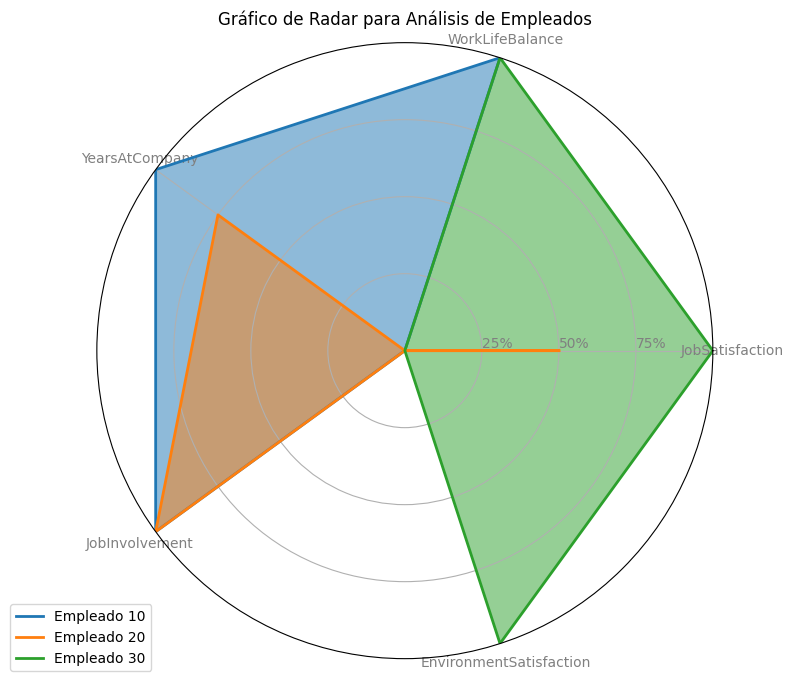

In [58]:
# Importando la librería necesaria
from math import pi

# Seleccionando los atributos para comparar
attributes = ['JobSatisfaction', 'WorkLifeBalance', 'YearsAtCompany', 'JobInvolvement', 'EnvironmentSatisfaction']
# Seleccionando algunos empleados para comparar
selected_employees = df.loc[[10, 20, 30], attributes]

# Normalizando los datos para que estén en la misma escala
selected_employees_normalized = (selected_employees - selected_employees.min()) / (selected_employees.max() - selected_employees.min())

# Creando el gráfico de radar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
plt.title('Gráfico de Radar para Análisis de Empleados')

# Añadiendo cada empleado al gráfico de radar
for idx, employee in selected_employees_normalized.iterrows():
    values = employee.tolist() + [employee.tolist()[0]] # Repitiendo el primer valor para cerrar el círculo
    angles = [n / float(len(attributes)) * 2 * pi for n in range(len(attributes))]
    angles += angles[:1] # Repitiendo el primer ángulo para cerrar el círculo
    ax.plot(angles, values, linewidth=2, label=f'Empleado {idx}')
    ax.fill(angles, values, alpha=0.5)

# Añadiendo etiquetas para los atributos
plt.xticks(angles[:-1], attributes, color='grey', size=10)
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75], ['25%', '50%', '75%'], color='grey', size=10)
plt.ylim(0, 1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


In [59]:
selected_employees_normalized

,JobSatisfaction,WorkLifeBalance,YearsAtCompany,JobInvolvement,EnvironmentSatisfaction
10,0.0,1.0,1.00,1.0,0.0
20,0.5,0.0,0.75,1.0,0.0
30,1.0,1.0,0.00,0.0,1.0


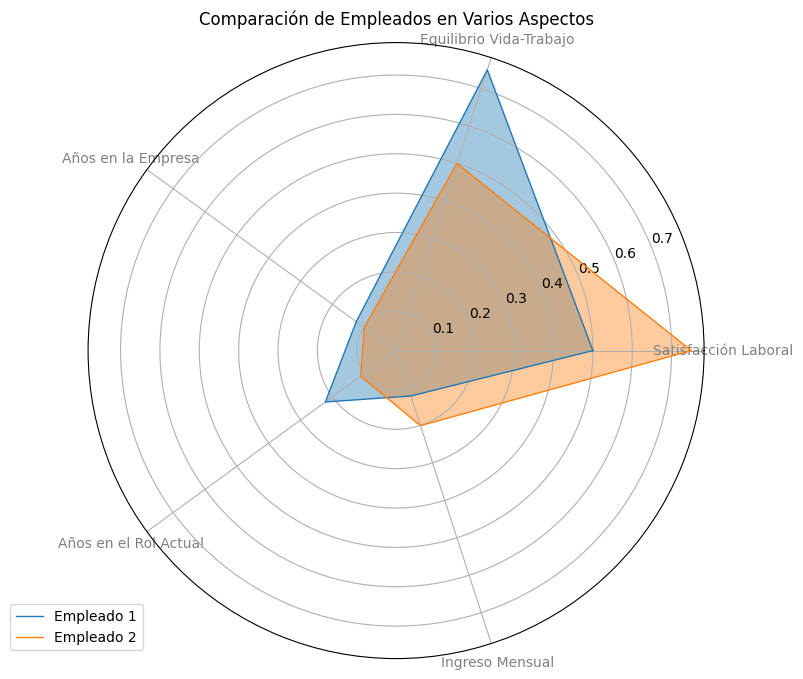

In [67]:
import numpy as np

# Selección de dos empleados para comparar (puedes cambiar estos índices según tus necesidades)
employee1 = df.loc[10]
employee2 = df.loc[20]

# Métricas para comparar
metrics = ['JobSatisfaction', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'MonthlyIncome']
labels = ['Satisfacción Laboral', 'Equilibrio Vida-Trabajo', 'Años en la Empresa', 'Años en el Rol Actual', 'Ingreso Mensual']

# Normalización de los valores para que estén en la misma escala
values1 = [employee1[metric] / df[metric].max() for metric in metrics]
values2 = [employee2[metric] / df[metric].max() for metric in metrics]

# Agregando el primer valor al final para cerrar el círculo
values1 += values1[:1]
values2 += values2[:1]

# Número de variables
num_vars = len(labels)

# Ángulos para cada eje
angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]

# Creando el gráfico de radar
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Añadiendo los ejes para cada métrica
plt.xticks(angles[:-1], labels, color='grey', size=10)

# Plotting los valores para cada empleado
ax.plot(angles, values1, linewidth=1, linestyle='solid', label='Empleado 1')
ax.fill(angles, values1, alpha=0.4)
ax.plot(angles, values2, linewidth=1, linestyle='solid', label='Empleado 2')
ax.fill(angles, values2, alpha=0.4)

# Añadiendo una leyenda
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Añadiendo un título
plt.title("Comparación de Empleados en Varios Aspectos")

# Mostrando el gráfico
plt.show()


### Gráfico de Facetas (FacetGrid): Para comparar distribuciones en varias categorías y niveles, por ejemplo, la satisfacción en diferentes departamentos y niveles de educación.

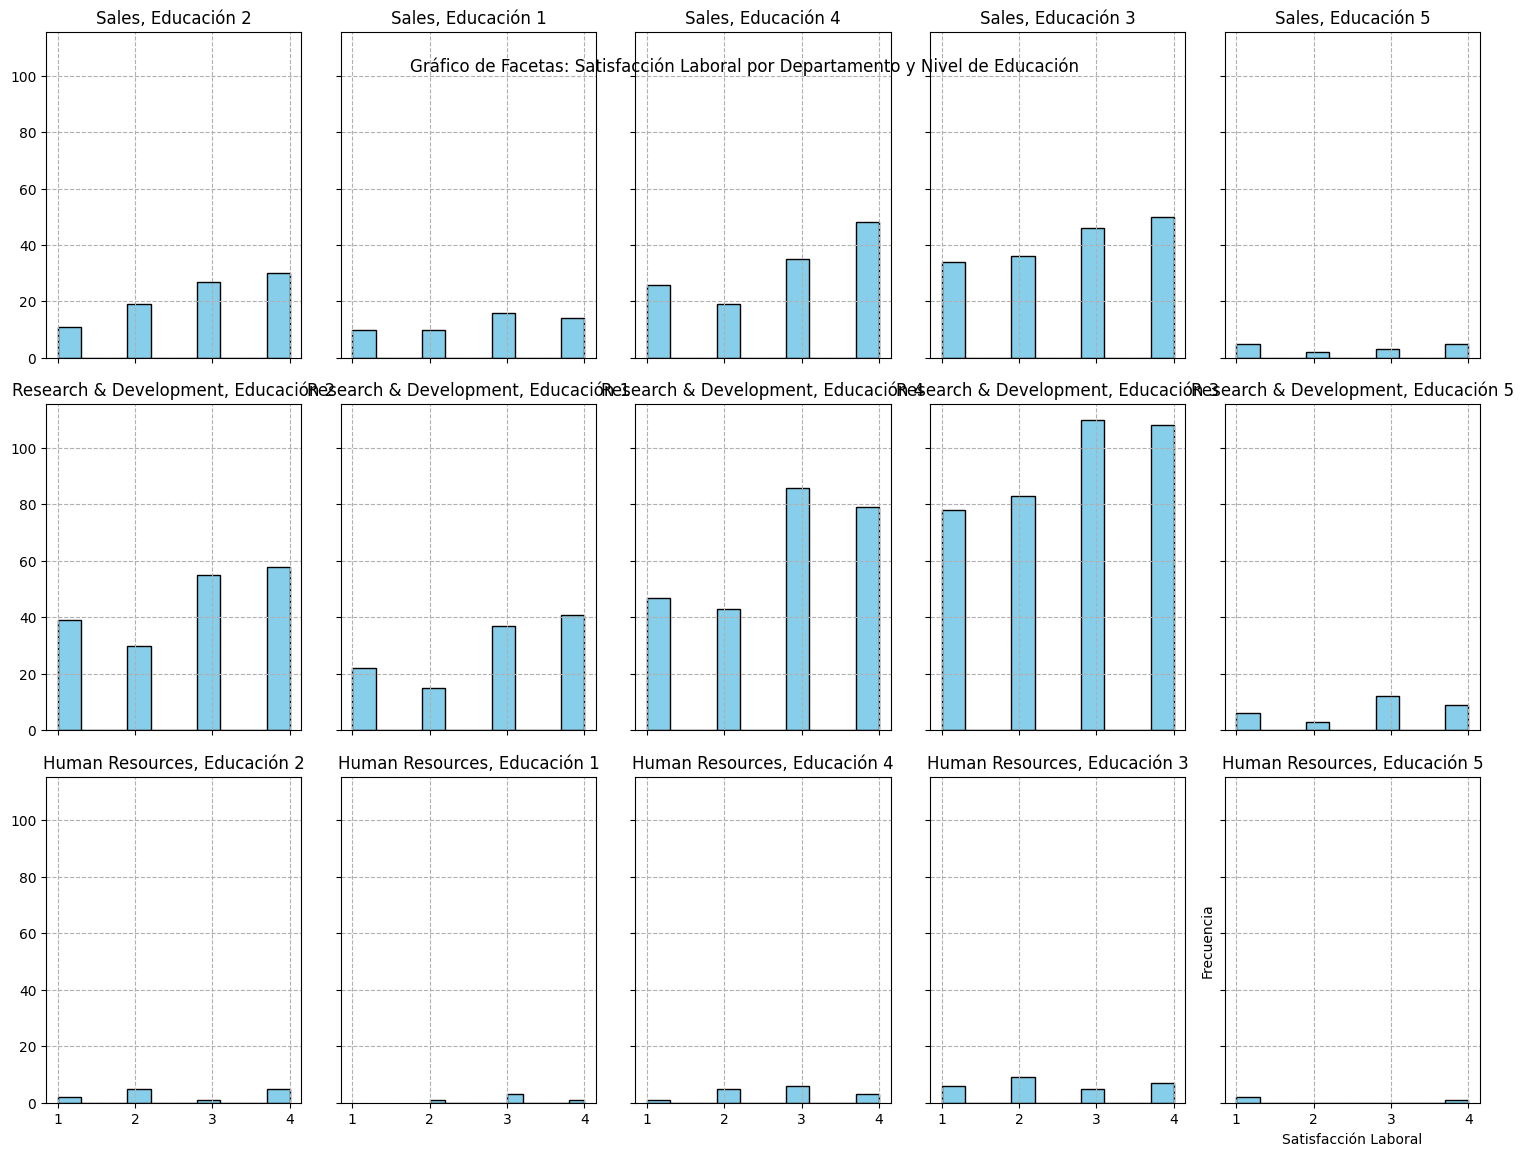

In [60]:
# Definiendo las categorías para las facetas
departments = df['Department'].unique()
education_levels = df['Education'].unique()

# Creando la figura y los ejes (subgráficos) para las facetas
fig, axes = plt.subplots(len(departments), len(education_levels), figsize=(15, 12), sharex=True, sharey=True)

# Iterando a través de los departamentos y niveles de educación para crear los histogramas
for i, department in enumerate(departments):
    for j, education_level in enumerate(education_levels):
        ax = axes[i, j]
        data_subset = df[(df['Department'] == department) & (df['Education'] == education_level)]
        ax.hist(data_subset['JobSatisfaction'], bins=10, color='skyblue', edgecolor='black')
        ax.set_title(f'{department}, Educación {education_level}')
        ax.grid(True, linestyle='--')

# Ajustando los detalles del gráfico
plt.suptitle('Gráfico de Facetas: Satisfacción Laboral por Departamento y Nivel de Educación', y=0.92)
plt.xlabel('Satisfacción Laboral')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


# Figuras y Ejes

En Matplotlib, una **figura** es el contenedor de nivel superior que contiene todos los elementos del gráfico, como los ejes, títulos, etiquetas y más. Puedes pensar en la figura como el lienzo en el que se dibuja el gráfico.

Aquí hay algunas de las cosas que puedes configurar en una figura:

+ **Tamaño**: Puedes establecer el tamaño de la figura en pulgadas utilizando el parámetro figsize.

+ **Color de Fondo**: Puedes cambiar el color de fondo de la figura.

+ **Resolución (DPI)**: Puedes establecer la resolución de la figura en puntos por pulgada (DPI).

+ **Bordes y Espaciado**: Puedes ajustar los bordes de la figura y el espaciado entre los subgráficos.

+ **Título**: Puedes añadir un título a toda la figura.

+ **Guardar en Archivo**: Puedes guardar la figura en un archivo en varios formatos, como PNG, JPEG, PDF, etc.

+ **Manejo de Subgráficos**: Puedes utilizar la figura para organizar múltiples subgráficos (axes) en una cuadrícula o disposición personalizada.

+ **Mostrar u Ocultar Ejes**: Puedes controlar si los ejes están visibles en la figura.

+ **Control de Ventana**: Si estás trabajando en un entorno interactivo, puedes controlar la ventana de la figura, como maximizarla, restaurarla, etc.

+ **Agregar Elementos Personalizados**: Puedes utilizar la figura para agregar elementos personalizados, como anotaciones, leyendas, imágenes y más.

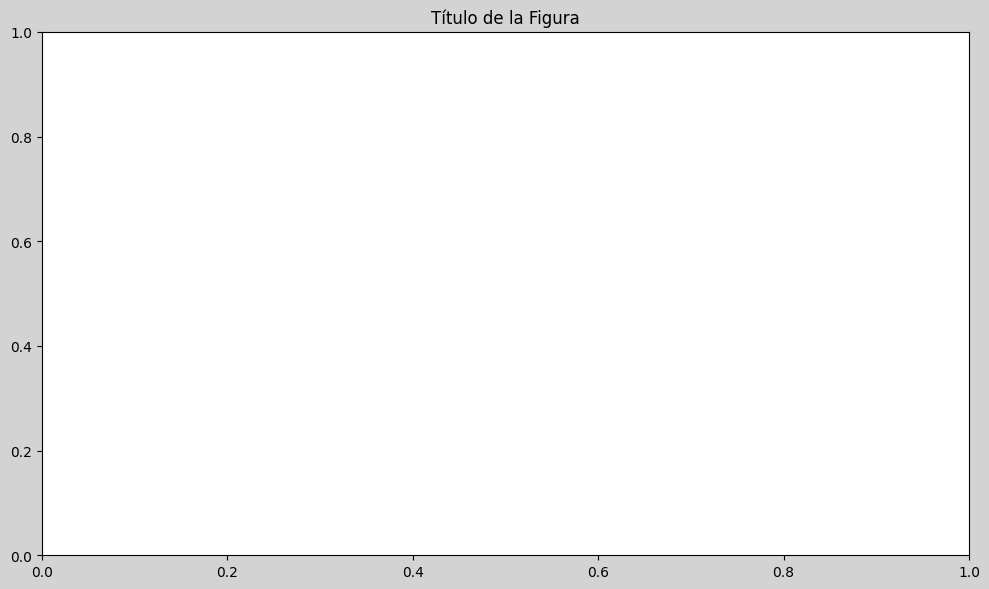

In [61]:
fig = plt.figure(figsize=(10, 6), facecolor='lightgray', dpi=100)
plt.title('Título de la Figura')
# Aquí puedes agregar tus gráficos, como plt.plot(), plt.scatter(), etc.
plt.tight_layout() # Ajusta el espaciado
# plt.savefig('mi_grafico.png') # Guarda la figura en un archivo
plt.show()


Los ejes en Matplotlib son el área en la que se dibujan los gráficos, como líneas, barras, dispersión, etc. Los ejes contienen los elementos clave del gráfico, como las marcas de las escalas, las líneas de cuadrícula, los títulos de los ejes y más. Los ejes son fundamentales para personalizar la apariencia de un gráfico y ofrecen muchas opciones para configurar:

Límites: Puedes establecer los límites de los ejess x e y utilizando set_xlim y set_ylim.

Etiquetas de los Ejes: Puedes configurar las etiquetas de los ejes x e y utilizando set_xlabel y set_ylabel.

Título de los Ejes: Puedes añadir un título a los ejes con set_title.

Marcas de las Escalas: Puedes personalizar las marcas de las escalas de los ejes x e y utilizando set_xticks y set_yticks.

Etiquetas de las Marcas: Puedes personalizar las etiquetas de las marcas de las escalas utilizando set_xticklabels y set_yticklabels.

Líneas de Cuadrícula: Puedes añadir o personalizar las líneas de cuadrícula con grid.

Leyenda: Puedes añadir una leyenda para describir los elementos del gráfico con legend.

Aspecto: Puedes establecer el aspecto de los ejes, como igualar las escalas de los ejes x e y, con set_aspect.

Escalas Logarítmicas: Puedes establecer escalas logarítmicas en los ejes x e y con set_xscale y set_yscale.

Colores y Estilos: Puedes personalizar los colores, estilos y anchos de línea de los bordes de los ejes.

Gráficos Anidados: Puedes añadir ejes adicionales dentro de los ejes existentes, como un pequeño gráfico anidado.

Manipulación de Subgráficos: Puedes utilizar los ejes para organizar múltiples subgráficos en una figura y ajustar su disposición y espaciado.

Elementos Adicionales: Puedes utilizar los ejes para agregar elementos adicionales, como anotaciones, flechas, texto personalizado y más.

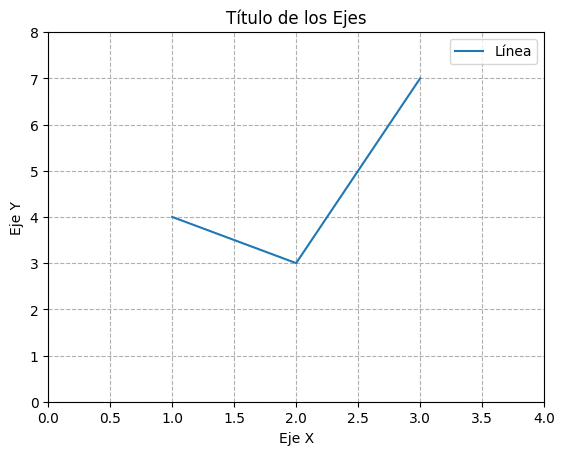

In [62]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3], [4, 3, 7])
ax.set_title('Título de los Ejes')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_xlim(0, 4)
ax.set_ylim(0, 8)
ax.grid(True, linestyle='--')
ax.legend(['Línea'])
plt.show()


# Colores

Los colores en Matplotlib juegan un papel crucial en la visualización de datos, ya que ayudan a diferenciar y destacar diferentes partes de un gráfico. Hay varias formas de especificar colores en Matplotlib, y aquí te presento algunas de las más comunes:

1. Nombres Predefinidos

Matplotlib viene con un conjunto de nombres predefinidos para colores comunes que puedes utilizar. Algunos ejemplos incluyen:

    + 'red'
    + 'blue'
    + 'green'
    + 'yellow'
    + 'purple'
    + 'orange'

2. Códigos de Colores HEX

Puedes utilizar códigos de colores HEX para especificar un color. Esto te permite elegir entre una amplia gama de colores:

    + '#FF0000': Rojo
    + '#00FF00': Verde
    + '#0000FF': Azul

3. Colores Grises

Puedes especificar un color gris utilizando una cadena que representa un número flotante en el rango de 0 (negro) a 1 (blanco). Por ejemplo:

    + '0.0': Negro
    + '0.5': Gris medio
    + '1.0': Blanco

4. Colores RGB

Puedes especificar un color utilizando una tupla de valores RGB, donde cada valor está en el rango de 0 a 1. Por ejemplo:

    + (1, 0, 0): Rojo
    + (0, 1, 0): Verde
    + (0, 0, 1): Azul

5. Mapas de Colores

Matplotlib ofrece varios mapas de colores predefinidos que puedes utilizar para colorear múltiples elementos, como en un gráfico de barras o un mapa de calor. Algunos ejemplos incluyen:

    + 'viridis'
    + 'plasma'
    + 'inferno'
    + 'magma'

Puedes aplicar un mapa de colores utilizando funciones como plt.cm.get_cmap.

6. Colores en Estilo de Línea

Puedes especificar el color junto con el estilo de línea en una sola cadena. Por ejemplo:

    + 'r-': Línea continua roja
    + 'g--': Línea discontinua verde
    + 'b:': Línea punteada azul

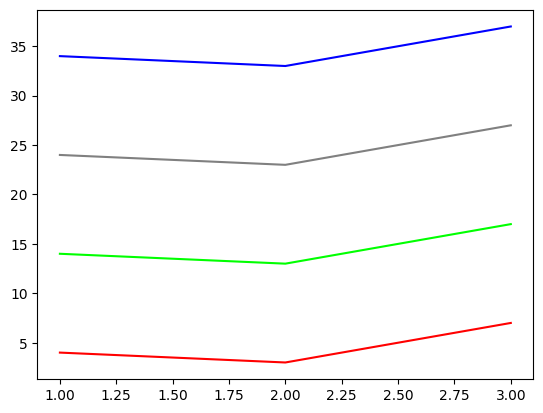

In [66]:
x = [1, 2, 3]
y1 = [4, 3, 7]
y2 = [14, 13, 17]
y3 = [24, 23, 27]
y4 = [34, 33, 37]

plt.plot(x, y1, color='red')            # Usando un nombre predefinido
plt.plot(x, y2, color='#00FF00')        # Usando un código HEX
plt.plot(x, y3, color='0.5')            # Usando un color gris
plt.plot(x, y4, color=(0, 0, 1))        # Usando una tupla RGB
plt.show()
